<a href="https://colab.research.google.com/github/ArySuby/sasap-test/blob/main/DistribucionLongMERLUZANORTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DistFrec_Mza_VA_Norte_2019_2023_2025.csv to DistFrec_Mza_VA_Norte_2019_2023_2025.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

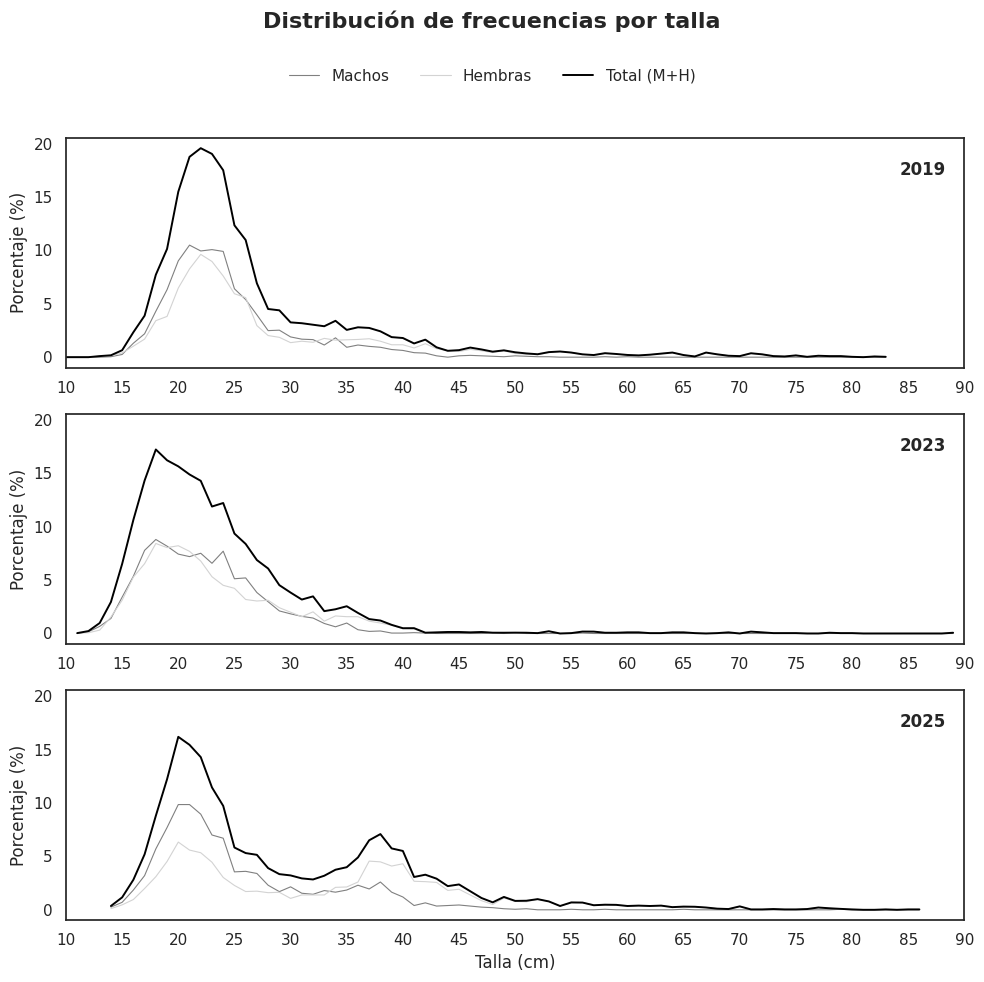

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer archivo CSV
df = pd.read_csv("DistFrec_Mza_VA_Norte_2019_2023_2025.csv", sep=';')

# Calcular total ajustado
df["por_total_ajustado"] = df["porm"] + df["porh"]

# Reformatear a largo
df_long = pd.melt(
    df,
    id_vars=["talla", "anio"],
    value_vars=["porm", "porh", "por_total_ajustado"],
    var_name="grupo",
    value_name="porcentaje"
)

# Limpiar y mapear grupos
df_long = df_long.dropna(subset=["porcentaje"])
df_long = df_long[(df_long["talla"] >= 10) & (df_long["talla"] <= 90)]
df_long["grupo"] = df_long["grupo"].map({
    "porm": "Machos",
    "porh": "Hembras",
    "por_total_ajustado": "Total (M+H)"
})

# Estilos personalizados
estilos = {
    "Machos": {"color": "gray", "linestyle": "-", "linewidth": 0.8},
    "Hembras": {"color": "lightgray", "linestyle": "-", "linewidth": 0.8},
    "Total (M+H)": {"color": "black", "linestyle": "-", "linewidth": 1.4}
}

# Crear figura y ejes con subplots
anios = sorted(df_long["anio"].unique())
fig, axes = plt.subplots(len(anios), 1, figsize=(10, 10), sharex=True, sharey=True)

for i, anio in enumerate(anios):
    ax = axes[i]
    for grupo, props in estilos.items():
        subset = df_long[(df_long["anio"] == anio) & (df_long["grupo"] == grupo)]
        ax.plot(subset["talla"], subset["porcentaje"],
                label=grupo if i == 0 else None,
                color=props["color"],
                linestyle=props["linestyle"],
                linewidth=props["linewidth"])

    # Ejes X e Y
    ax.set_xlim(10, 90)
    ax.set_xticks(range(10, 91, 5))
    ax.set_xticklabels(range(10, 91, 5))
    ax.set_yticks([0, 5, 10, 15, 20])
    ax.set_ylabel("Porcentaje (%)")
    ax.text(0.98, 0.90, str(anio), transform=ax.transAxes,
            ha="right", va="top", fontsize=12, fontweight="bold")
    ax.tick_params(axis='x', labelbottom=True)  # mostrar etiquetas X en todos

# Eje X
axes[-1].set_xlabel("Talla (cm)")

# Título y leyenda centradas arriba
fig.suptitle("Distribución de frecuencias por talla", fontsize=16, fontweight="bold", y=0.98)
fig.legend(labels=list(estilos.keys()), loc="upper center", ncol=3, frameon=False, bbox_to_anchor=(0.5, 0.935))

# Ajustes de diseño
plt.tight_layout(rect=[0, 0, 1, 0.91])  # espacio para título y leyenda

# Guardar PDF
plt.savefig("Distribucion_Frecuencias_Merluza_COLAB_FINAL_v2.pdf")

# Descargar
from google.colab import files
files.download("Distribucion_Frecuencias_Merluza_COLAB_FINAL_v2.pdf")
